### Portfolio 4 - Analysis of Patients in Wisconsin with Breast Cancer Diagnosis (2024 S1)
This report will analyse a data set named "Wisconsin Breast Cancer Diagnosis". It contains details about malignant tumors in patients in which multiple models will try to predict if a patient has such diagnosis. This report will also train and evaluate classification models to predict whether a patient has cancer or not.

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [137]:
df = pd.read_csv('data.csv')
df.info() # can identify if any data needs to be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [138]:
df.head() # print the first 5 rows of the dataset starting from index 0

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Cleaning the data

In order to provide a clean dataset, some data that is not relevant in the analysis will need to be removed.
In this case, below we can see that there are 569 intances where NaN occurs.

In [139]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [140]:
print('Number of duplicate values:',sum(df['id'].duplicated())) # shows that there are 0 duplicate values in ID column

Number of duplicate values: 0


In [141]:
missing_values = df[pd.isnull(df).any(axis=1)] # there are no missing values apart from the 'Unamed:32'
missing_values # however diagnosis shows values that seem categorical (we will get to that in a bit)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [142]:
df.drop('Unnamed: 32', axis=1, inplace=True) # removes the Unamed: 32 column
df.drop('id', axis=1, inplace=True) # removes the id column

In [143]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Visualisation

In [144]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


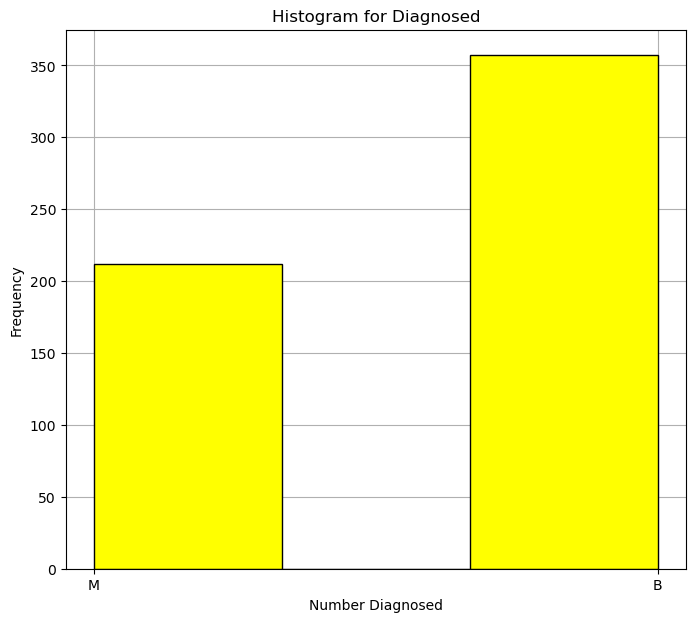

In [145]:
diagnosis_df = df['diagnosis']


plt.figure(figsize=(8, 7))
plt.hist(diagnosis_df, bins=3, color='yellow', edgecolor='black',zorder = 2)
plt.xlabel('Number Diagnosed')
plt.ylabel('Frequency')
plt.title('Histogram for Diagnosed')
plt.grid(True, zorder=1)
plt.show()

This Histogram shows the number of people diagnosed with malignant (M) tumors vs people who are benign (B). Note: A person with malignant tumors have cancerous cells in a tumor. A person who is benign is a person who have normal cells in their tumor and thus not cancerous. See website for more details: https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/cancer

### Replacing Categorical Values with Numeric Values
Thus, we should replace the M(Malignant) and B(Benign) with 1 (has cancer) and 0 (no cancer)

In [146]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1,'B': 0})

In [147]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [169]:
# Separate features from target variable
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

Additionally, although id is a unique variable, it does not contain any information that determines if someone has cancer or not, thus it must get removed

## Correlation Matrix

In [170]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [171]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

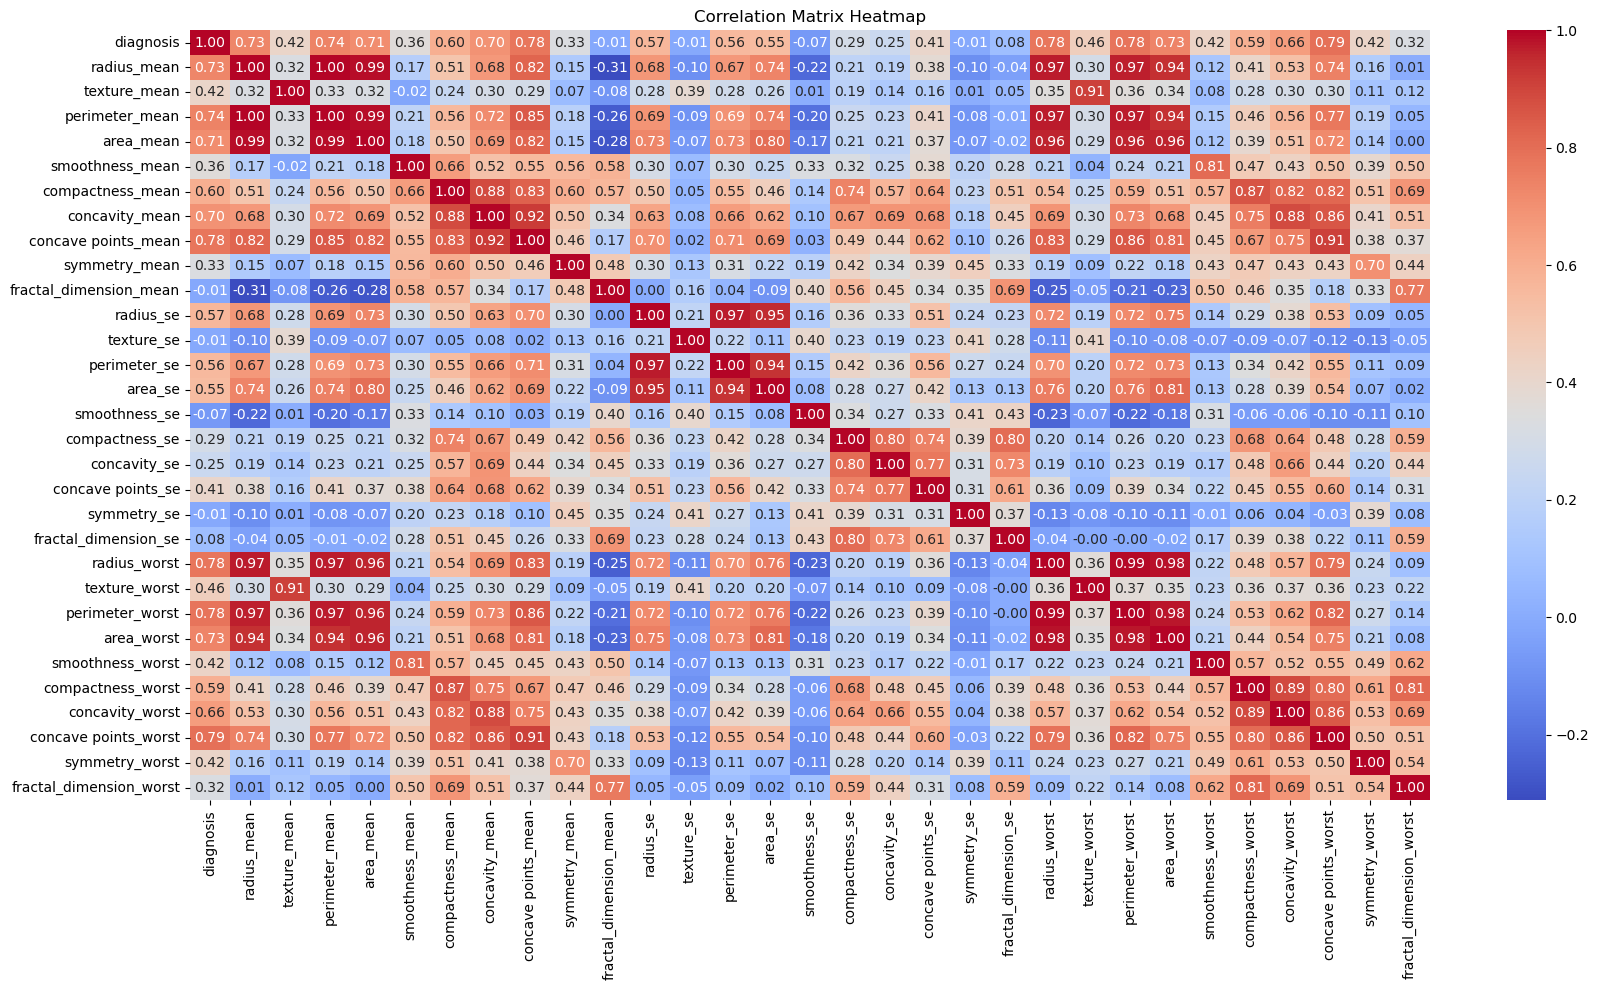

In [172]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

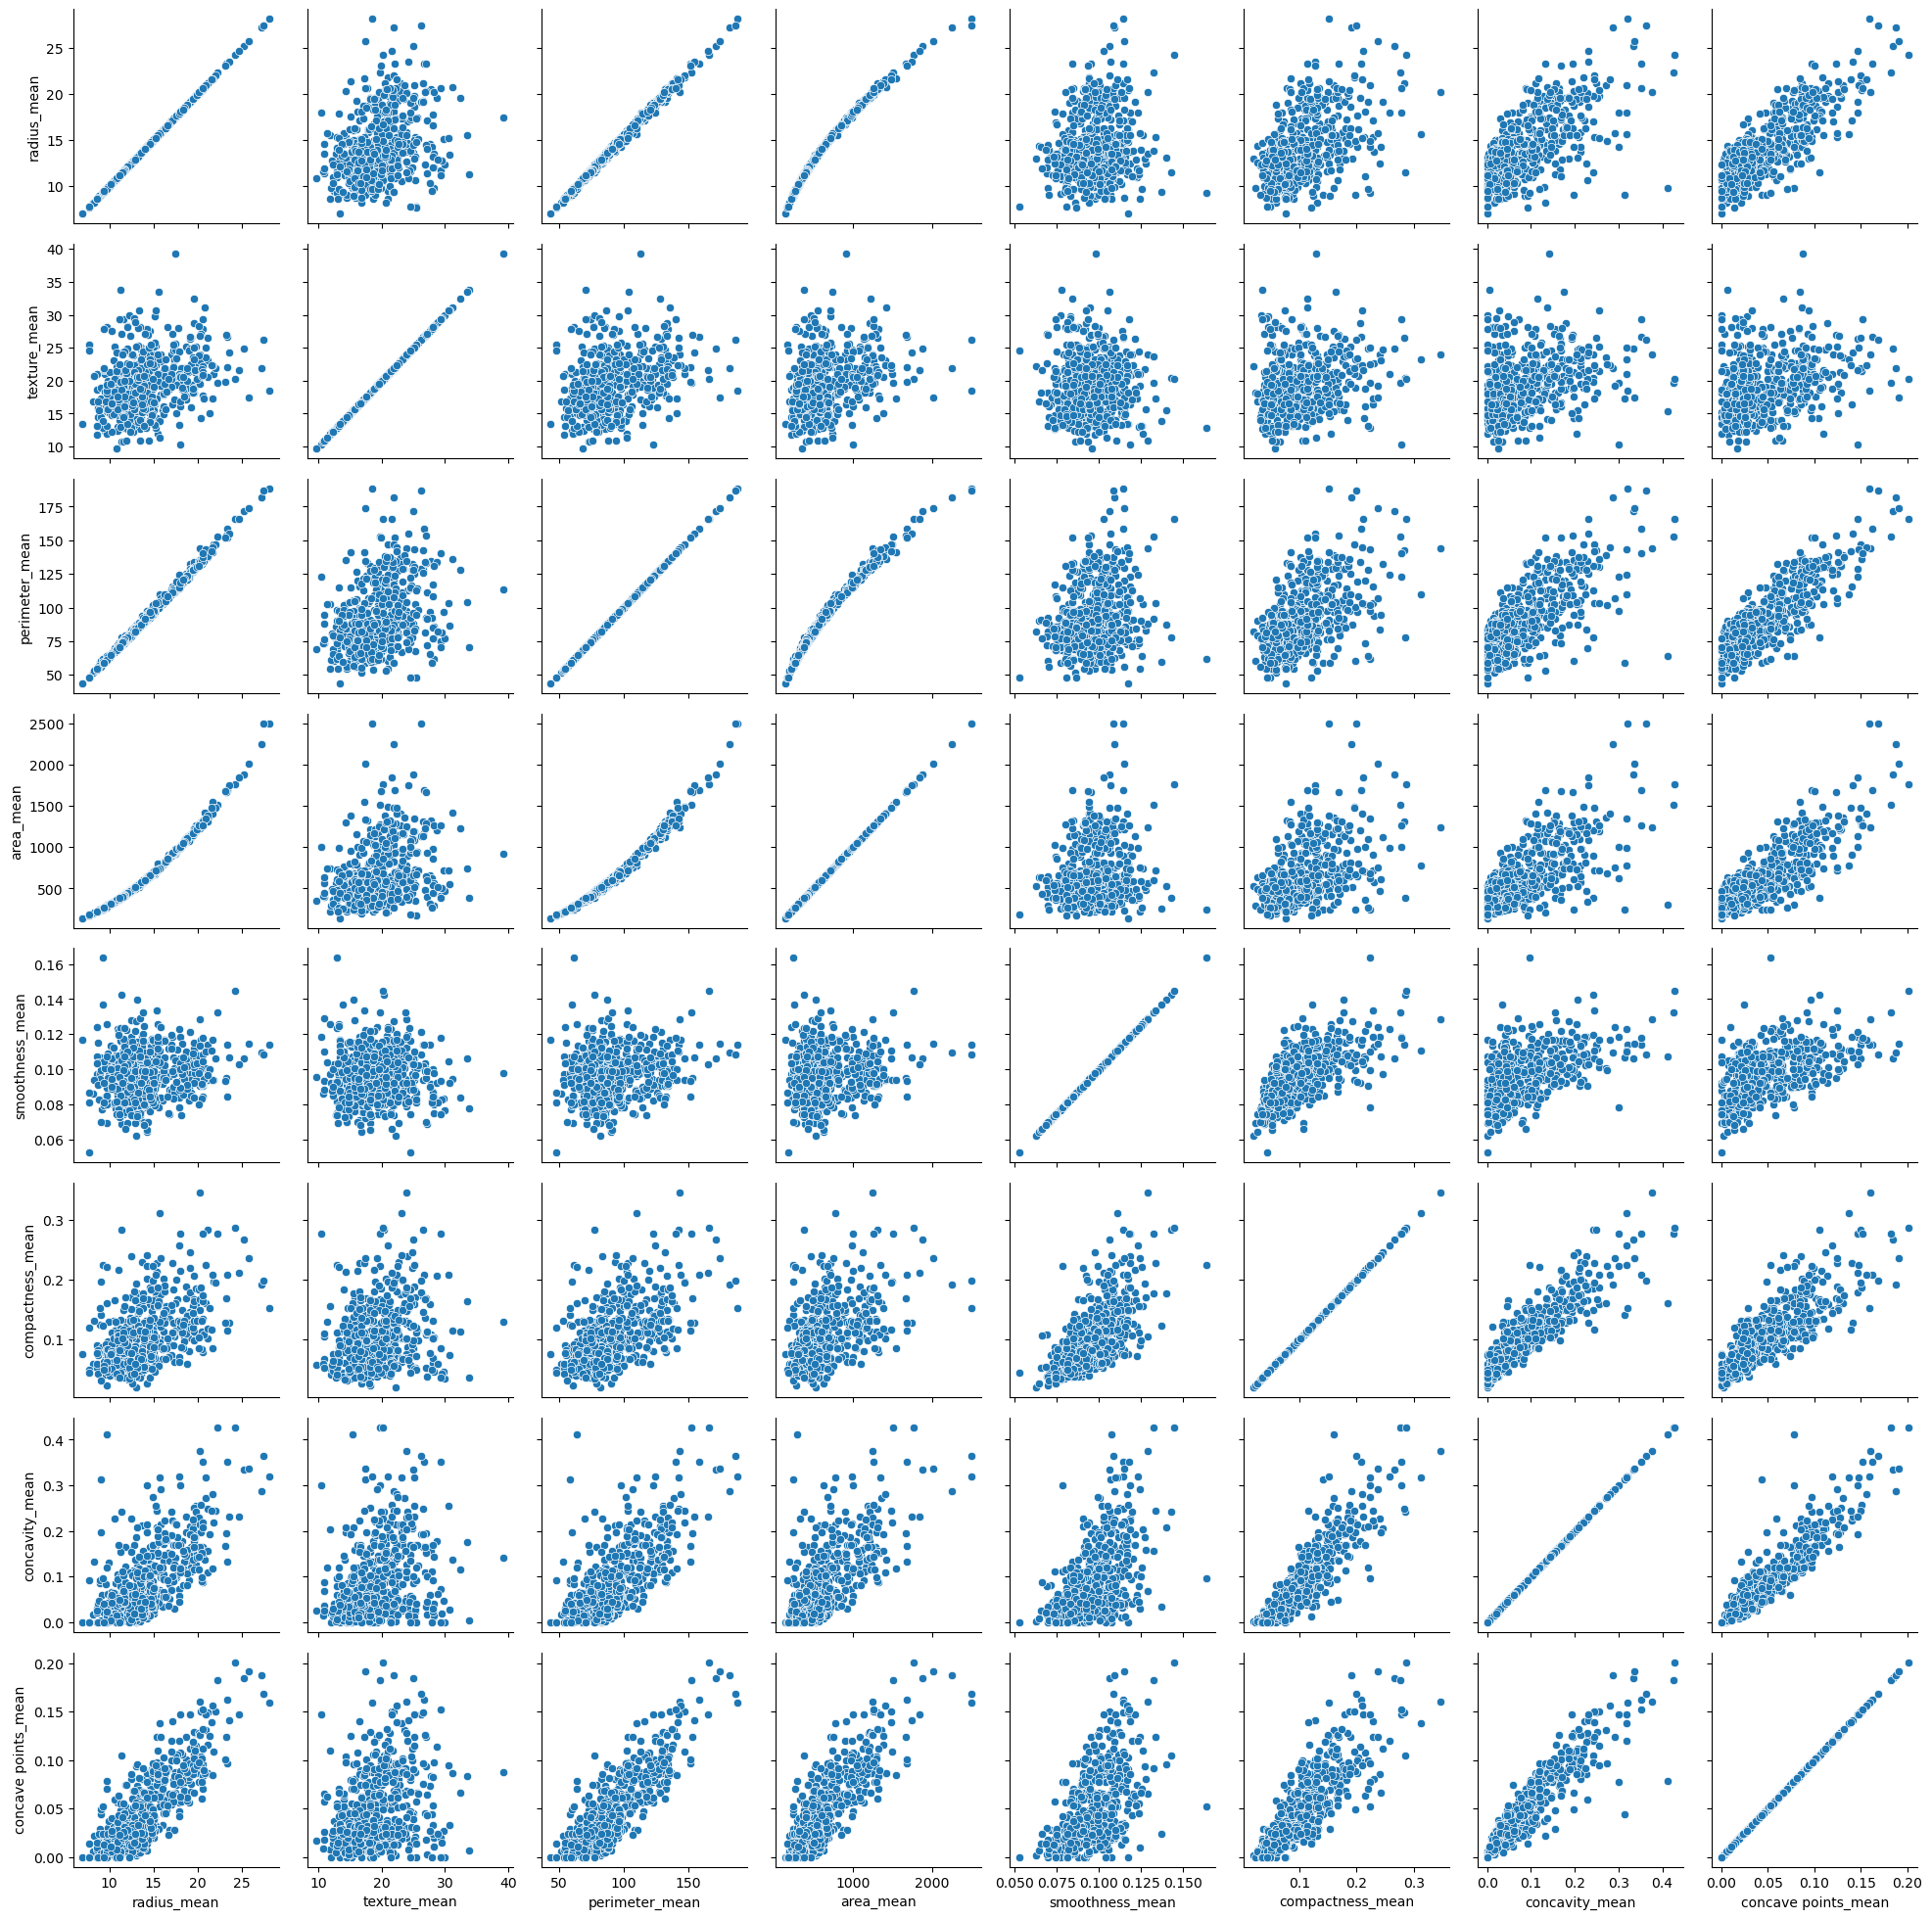

In [173]:
feature_means = list(df.columns[1:9])

# Plot pairwise scatterplots
feature_pairs = sns.PairGrid(df[feature_means])
feature_pairs.map(sns.scatterplot)

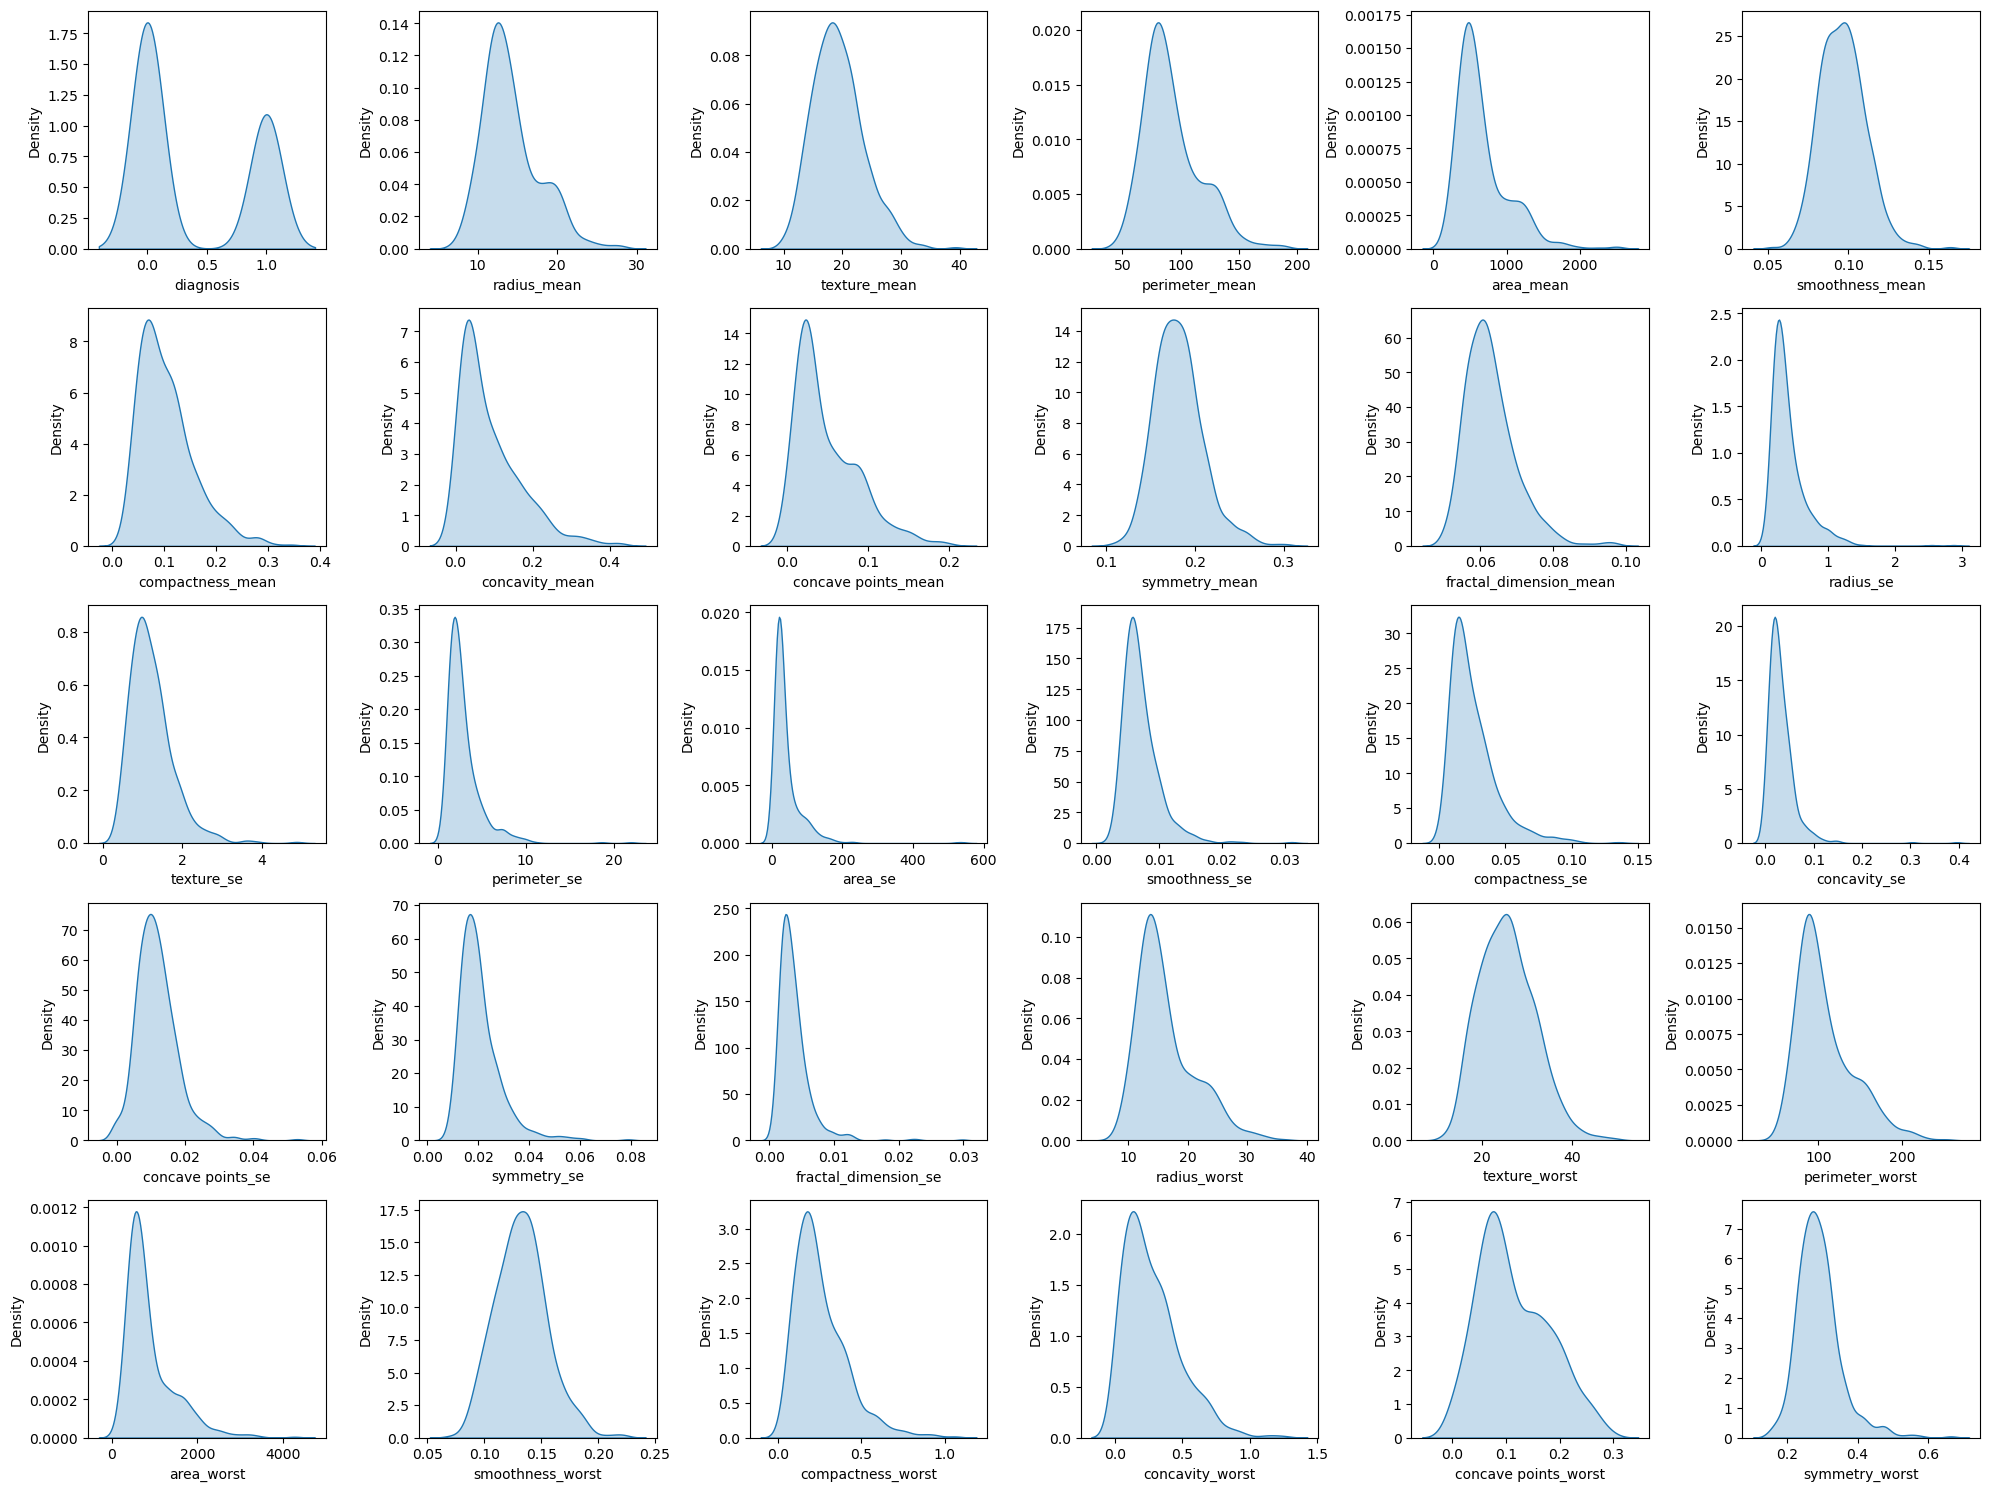

In [174]:
plt.figure(figsize=(20, 15))
plot_number = 1

for column in df.columns:
    if plot_number <= 30:
        ax = plt.subplot(5, 6, plot_number)
        sns.kdeplot(data=df[column], fill=True, ax=ax)
        plt.xlabel(column)
        plot_number += 1

plt.tight_layout()
plt.show()

## Baseline model (initial model)

In [175]:
baseline_pred = model.predict(X_test)

In [176]:
print("Mean Squared Error:", mean_squared_error(y_test, baseline_pred))
print("R-squared:", r2_score(y_test, baseline_pred))

Mean Squared Error: 0.043859649122807015
R-squared: 0.8132983950212905


## Mean Squared Error

The value presented of 0.04386 suggests that the model is making accurate predictions with minimal error.


## R Squared
The value presented of 0.81 means that the 81% variability can be explained by the selected features. A value of 0.81 suggests that the model is somewhat effective in predicting if a patient has malignant cancer.



## Logistical Regression Analysis
 ### - Splitting the dataset

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
# 20% of data will be used for testing and 80% will be used for training

In [179]:
model = LogisticRegression(max_iter=5000)

In [180]:
model.fit(X_train, y_train) 

LogisticRegression(max_iter=5000)

In [181]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [182]:
train_accuracy_logistic = accuracy_score(y_train, y_train_pred)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred)
print("Logistic Regression Training Set Model Accuracy:", train_accuracy_logistic)
print("Logistic Regression Test Set Model Accuracy:", test_accuracy_logistic)

Logistic Regression Training Set Model Accuracy: 0.9604395604395605
Logistic Regression Test Set Model Accuracy: 0.956140350877193


The training and test set models for Logistic Regression are quite accurate having a accuracies of over 95%. However, since the training set model has a slightly higher accuracy than the test set, it may indicate slight overfitting.

## Evaluating and Training KNN Model

In [183]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [185]:
KNN_train_accuracy = KNN_model.score(X_train.values, y_train)
KNN_test_accuracy = KNN_model.score(X_test.values, y_test)
print("KNN Model Accuracy Training Set:", KNN_train_accuracy)
print("KNN Model Accuracy Test Set:", KNN_test_accuracy)

KNN Model Accuracy Training Set: 0.9406593406593406
KNN Model Accuracy Test Set: 0.956140350877193


/Users/aiden/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/aiden/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Tuning Hyperparameters

In [202]:
# Define search space for parameters
param_grid = {'n_neighbors': np.arange(1, 41)}

# Create the machine learning model
grid_search = GridSearchCV(KNN_model, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train.values, y_train)

# Identify the best parameter(s)
print('Best K value:', grid_search.best_params_['n_neighbors'])
print('Accuracy:', grid_search.best_score_)

Best K value: 3
Accuracy: 0.9273913043478261


## Visualising KNN Results

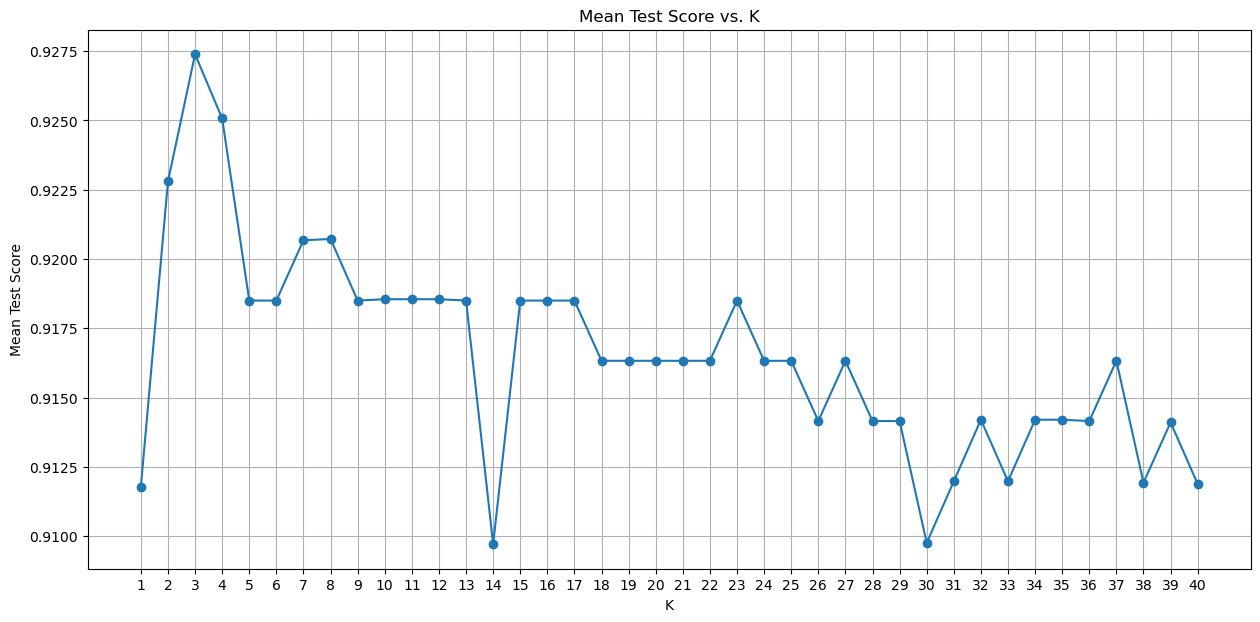

In [203]:
results = grid_search.cv_results_
plt.figure(figsize=(15, 7))
plt.plot(results['param_n_neighbors'], results['mean_test_score'],marker='o')
plt.title('Mean Test Score vs. K')
plt.xlabel('K')
plt.ylabel('Mean Test Score')
plt.xticks(np.arange(1, 41, 1))
plt.grid(True)
plt.show()

Shows all of the K values and from that we can see that 3 has the best K value. Additionally an accuracy of 92.3% shows the model can determine if a patient has a malignant tumor to a reasonable moderate extent. Even though the accuracy is quite high, I would recommend more testing if this model were to be used for predicting if a patient has malignant cancer or not.

## Decsion Tree

In [204]:
dt_classifier.fit(X_train, y_train) # trains the model using training data

DecisionTreeClassifier()

In [205]:
dt_train_pred = dt_classifier.predict(X_train) # prediction of training data
dt_test_pred = dt_classifier.predict(X_test) # predictions of testing data

In [206]:
# Calculate the accuracy of both models
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print("Decision Tree Training Accuracy:", dt_train_accuracy)
print("Decision Tree Testing Accuracy:", dt_test_accuracy)

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9473684210526315


The Decision Tree model performs quite well having a test accuracy of 94.73%.

## Random Forest

In [212]:
# trains the model using training data
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [214]:
rf_train_pred = rf_classifier.predict(X_train) # prediction of training data
rf_test_pred = rf_classifier.predict(X_test) # prediction of testing data

In [213]:
# Calculate the accuracy of both models
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
print("Random Forest Training Accuracy:", rf_train_accuracy)
print("Random Forest Testing Accuracy:", rf_test_accuracy)

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.9649122807017544


The RandomForest model performs slightly better than the Decision Tree model because if it's higher accuracy of 96.49%

### Comparing Decision Tree and Random Forest Results

Since Random Forests are an ensemble learning model and are a collection of decision trees, I thought it would be useful to include both to see how they compare in accuracy against each other. We can see that the Random Forest in this model performs better than the Decision Tree. However, both models have their perks and drawbacks and since Random Trees seem to be more robust to overfitting the model generally, I would recommend using a Random Forest over a Decision Tree.